Callback, который будет выводить на каждой
эпохе:
1. Текущую mae
2. График mae по всем эпохам на обучающей и проверочная выборках
3. Текущий scatter
4. Текущую гистограмму ошибок
5. Время обучения на эпохе, время обучения суммарное и сколько времени остаётся
до конца обучения
6. Изменял бы шаг обучения, если начинается “пила” или mae выходит на плато
7. Сохраняет в .h5 сеть с лучшей точностью


In [ ]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import LambdaCallback

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from google.colab import files

import random
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import backend as K
import keras
import keras.utils
from keras import utils as np_utils
import time
import datetime

In [ ]:
yScaler = StandardScaler()

yScaler.fit(yTrain.reshape(-1, 1))

yTrainScaled = yScaler.transform(yTrain.reshape(-1, 1))

print(yTrainScaled.shape)
print(yTrain[1])
print(yTrainScaled[1])

(62967, 1)
40.0
[-0.3025949]


In [ ]:
print(min(yTrain), max(yTrain))
print(min(yTrainScaled), max(yTrainScaled))

0.001 24700.0
[-0.62864885] [200.71469124]


In [ ]:
pred = model.predict(xTrain01)
predUnscaled = yScaler.inverse_transform(pred).flatten()

delta = predUnscaled - yTrain
absDelta = abs(delta)
print(sum(absDelta) / len(absDelta))

1968/1968 [==============================] - 3s 1ms/step
9448.815474009636


In [ ]:
print(xTrain01.shape)
print(yTrain.shape)

(62967, 39)
(62967,)


In [ ]:
start_time = datetime.datetime.now()
epoch_start = datetime.datetime.now()
cur_time = datetime.datetime.now()

In [ ]:
epoch = 1

In [ ]:
#Вариант 1

Epoch 1/50
492/492 [==============================] - 5s 11ms/step - loss: 13477.6562 - mae: 32.9595
Epoch 2/50
492/492 [==============================] - 5s 9ms/step - loss: 13512.8154 - mae: 32.6862
Epoch 3/50
492/492 [==============================] - 6s 11ms/step - loss: 13505.4707 - mae: 32.6958
Epoch 4/50
492/492 [==============================] - 5s 10ms/step - loss: 13485.5635 - mae: 32.5660
Epoch 5/50
492/492 [==============================] - 4s 9ms/step - loss: 13477.6846 - mae: 32.5881
Epoch 6/50
492/492 [==============================] - 6s 13ms/step - loss: 13460.6172 - mae: 32.4655
Epoch 7/50
492/492 [==============================] - 5s 10ms/step - loss: 13450.3438 - mae: 32.4693
Epoch 8/50
492/492 [==============================] - 5s 9ms/step - loss: 13459.8779 - mae: 32.4687
Epoch 9/50
492/492 [==============================] - 6s 13ms/step - loss: 13452.7529 - mae: 32.3631
Epoch 10/50
492/492 [==============================] - 5s 10ms/step - loss: 13436.9590 - mae: 

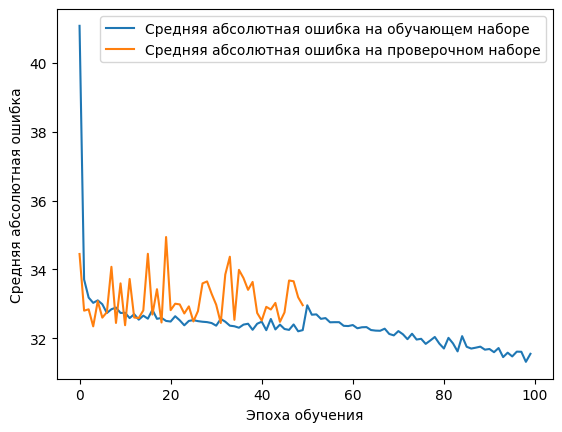

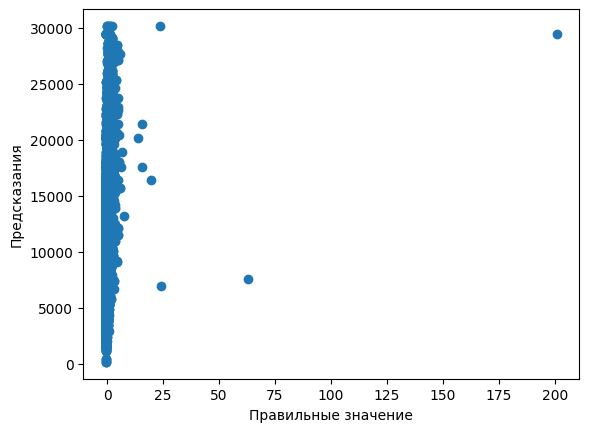

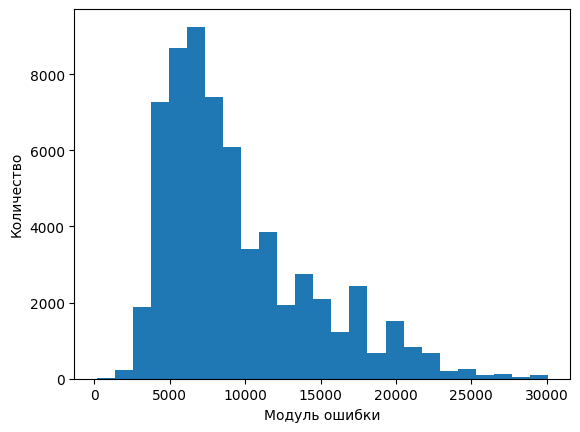

Время обучения на эпохе: 0:17:43.505590, суммарное время обучения: 0:17:43.505653 ,осталось до конца: 7:05:24.135648


In [ ]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        epoch_start = datetime.datetime.now()
        start_time = datetime.datetime.now()

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('mae', 'val_mae', 'epoch', 'val_loss'))
        clear_output(wait=True)

    def lr(self, training_data):
      if ((val_loss[epoch - 1] + val_loss[epoch]) > 1e-3):
        K.set_value(model.optimizer.learning_rate, 0.001)
        print('Mae выходит на плато, шаг обучения изменен')

      if ((val_loss[epoch - 1] + val_loss[epoch]) > 1e-3):
        K.set_value(model.optimizer.learning_rate, 0.001)
        print('Пила, шаг обучения изменен')


      if ['val_mae'] < self.val_mae1:
        model.save_weights('mae1.h5')

history = model.fit(xTrain01,
          yTrain,
          epochs=50,
          batch_size=128,
          callbacks=[history])

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

epochs=50

plt.scatter(yTrainScaled, predUnscaled)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.show()

plt.hist(absDelta, bins=25)
plt.xlabel('Модуль ошибки')
plt.ylabel('Количество')
plt.show()


cur_time = datetime.datetime.now()
train_time = cur_time - start_time
epoch_time = cur_time - epoch_start
avg_time = (train_time / (epoch + 1))
left_epochs = (epochs - (epoch + 1))
left_time = avg_time * left_epochs
print("Время обучения на эпохе: ",epoch_time,", ","суммарное время обучения: ",train_time," ,","осталось до конца: ",left_time,sep="")

In [ ]:
#Вариант 2

Epoch 1/50
492/492 [==============================] - 4s 9ms/step - loss: 13285.5225 - mae: 31.5201
Epoch 2/50
492/492 [==============================] - 6s 13ms/step - loss: 13313.0078 - mae: 31.3051
Epoch 3/50
492/492 [==============================] - 4s 9ms/step - loss: 13290.3955 - mae: 31.3973
Epoch 4/50
492/492 [==============================] - 5s 9ms/step - loss: 13257.5029 - mae: 31.4503
Epoch 5/50
492/492 [==============================] - 6s 13ms/step - loss: 13354.1494 - mae: 31.4880
Epoch 6/50
492/492 [==============================] - 5s 9ms/step - loss: 13327.7090 - mae: 31.3328
Epoch 7/50
492/492 [==============================] - 5s 11ms/step - loss: 13302.7598 - mae: 31.2955
Epoch 8/50
492/492 [==============================] - 6s 11ms/step - loss: 13300.5205 - mae: 31.3151
Epoch 9/50
492/492 [==============================] - 4s 9ms/step - loss: 13273.7354 - mae: 31.3451
Epoch 10/50
492/492 [==============================] - 5s 11ms/step - loss: 13264.6904 - mae: 31

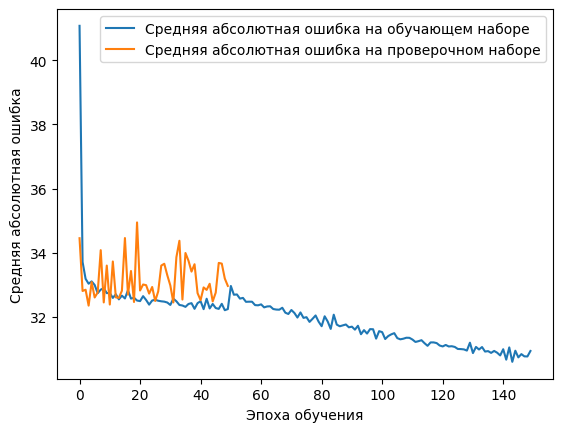

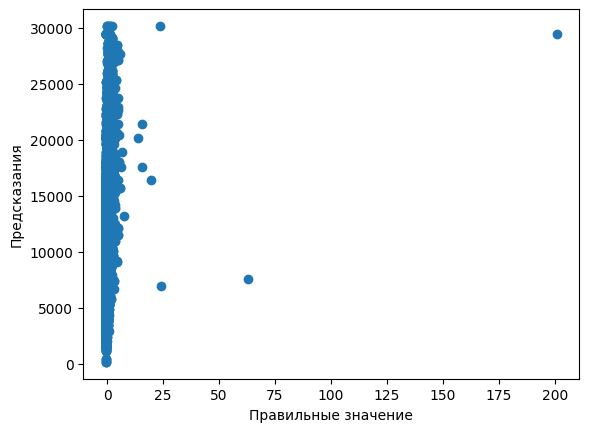

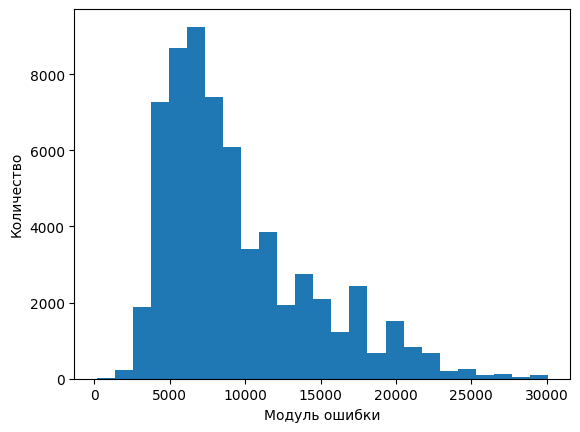

Время обучения на эпохе: 0:22:06.343525, суммарное время обучения: 0:22:06.343588 ,осталось до конца: 8:50:32.246112


In [ ]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        epoch_start = datetime.datetime.now()
        start_time = datetime.datetime.now()

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('mae', 'val_mae', 'epoch'))

    def lr(self, training_data):
      self.mae_min = 0
      self.cur_mae = np.inf
      self.mae_max = 0.1
      if self.cur_mae < self.mae_min:
        K.set_value(model.optimizer.learning_rate, 0.001)
        print('Mae выходит на плато, шаг обучения изменен')

      if self.cur_mae > self.mae_max:
        K.set_value(model.optimizer.learning_rate, 0.001)
        print('Пила, шаг обучения изменен')


      if ['val_mae'] < self.val_mae1:
        model.save_weights('mae1.h5')

history = model.fit(xTrain01,
          yTrain,
          epochs=50,
          batch_size=128,
          callbacks=[history])

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

epochs=50

plt.scatter(yTrainScaled, predUnscaled)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.show()

plt.hist(absDelta, bins=25)
plt.xlabel('Модуль ошибки')
plt.ylabel('Количество')
plt.show()


cur_time = datetime.datetime.now()
train_time = cur_time - start_time
epoch_time = cur_time - epoch_start
avg_time = (train_time / (epoch + 1))
left_epochs = (epochs - (epoch + 1))
left_time = avg_time * left_epochs
print("Время обучения на эпохе: ",epoch_time,", ","суммарное время обучения: ",train_time," ,","осталось до конца: ",left_time,sep="")